In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix 
import seaborn as sns

In [10]:
mnist = fetch_openml('mnist_784')
x = mnist['data']
y = mnist['target']
x = x.to_numpy()
y = y.to_numpy()
x.shape
class_labels = ['0','1','2','3','4','5','6','7','8','9']

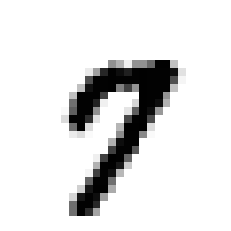

In [3]:
some_data = x[40001]
some_data_image = some_data.reshape(28, 28)
plt.imshow(some_data_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

x_train = x[0:60000]
y_train = y[0:60000]
x_test = x[60000:70000]
y_test = y[60000:70000]

shuffle_index = np.random.permutation(60000)
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]


y_train = y_train.astype('int8')
y_test = y_test.astype('int8')

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train, y_train , epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 757us/step - loss: 2.1793 - accuracy: 0.8186
Epoch 2/3
1875/1875 [==============================] - 1s 757us/step - loss: 0.2314 - accuracy: 0.9359
Epoch 3/3
1875/1875 [==============================] - 1s 757us/step - loss: 0.1648 - accuracy: 0.9527


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 442us/step - loss: 0.1874 - accuracy: 0.9502


In [6]:
predictions = model.predict(x_test)
np.argmax(predictions[2120])

4

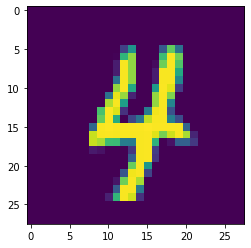

In [7]:
plt.imshow(x_test[2120].reshape(28,28))

Confusion Matrix

<AxesSubplot:>

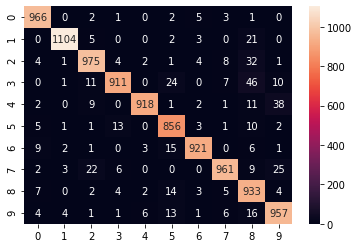

In [8]:
CM = confusion_matrix(y_test, [np.argmax(i) for i in predictions])
sns.heatmap(CM, annot=True, fmt="d")

Classificatio Report

In [11]:
from sklearn.metrics import classification_report
CR = classification_report(y_test, [np.argmax(i) for i in predictions], target_names=class_labels)
print(CR)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.97      0.90      0.93      1010
           4       0.99      0.93      0.96       982
           5       0.92      0.96      0.94       892
           6       0.98      0.96      0.97       958
           7       0.97      0.93      0.95      1028
           8       0.86      0.96      0.91       974
           9       0.92      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

